# Structural Similarity
### Till 27.03.2017 (task in the end of the file)

During this seminar we will:
1. Consider some node similarity measures, particularly: *Euclidean Distance*, *Correlation Coefficient* and *Cosine Distance*
2. Take a look at *[Cuthill-McKee](http://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm)* node reordering procedure
3. Calculate *Assortative mixing coefficient* for some **[Game Of Thrones](http://cdn.meme.am/instances/55597956.jpg)** network

In [92]:
import numpy as np
import pandas as pd
import scipy.spatial as spt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
%matplotlib inline

### Task 1 - Similarities Calculation

1. Calculate *Euclidean Distance*, *Correlation Coefficient* and *Cosine Distance* for some toy-network (Zachary again?) and for [Les Miserables](http://www-personal.umich.edu/~mejn/netdata/lesmis.zip) dataset
2. Visualize them

**HINT:**
For correlation coeficient you can use *np.corrcoef()*, for the distances you may implement them on your own or use *scipy.spatial.distance.pdist()*

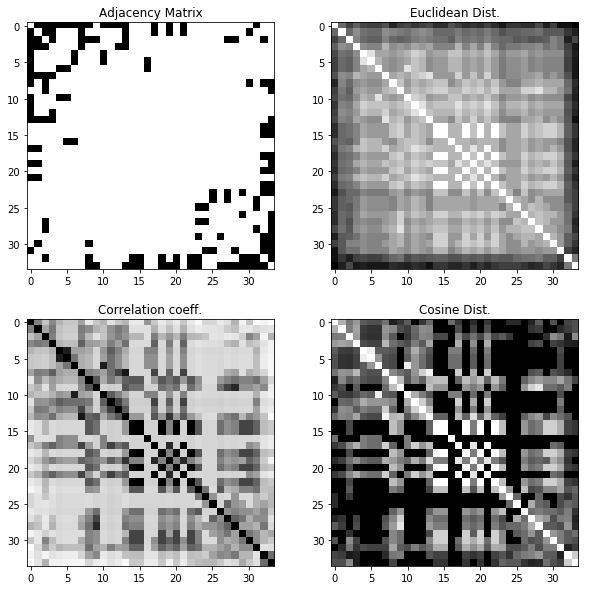

In [2]:
# Put your code here..
#
#
G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

def plotDist(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')
    
plotDist(A)   
    

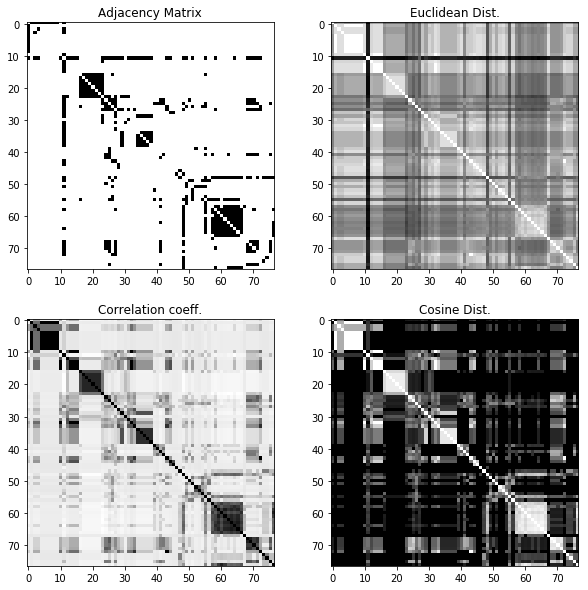

In [3]:
G = nx.read_gml('lesmis.gml')
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)

plotDist(A)

### Task 2 - Node Reordering

Without special preprocess procedures graph adjacency matrix can look very noisy and hide network's structure (just look at the matrices above). Offcourse usually you don't know the structure itself (communities, groups of closelly connected nodes, etc.) unless it is given, however there are some procedures of node reordering that provides a better view of the network's adjacency matrix.

*[Reverse Cuthill-McKee](http://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm)* finds permutation of the nodes that minimizes the **bandwidth** of the matrix, which is calculated as:
$$ \theta = \max_{a_{ij} > 0}|i-j|$$
Unformally, this algorithm puts some *mass* on the diagonal of adjacency matrix.

Run this reordering with *nx.utils.reverse_cuthill_mckee_ordering(G)* and compare with the results above

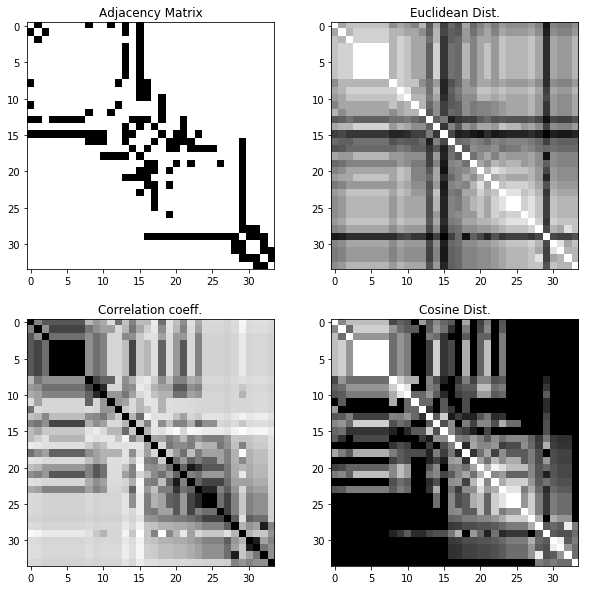

In [4]:
# Put your code here
#
#
G = nx.karate_club_graph()

# run procedure
cm = nx.utils.reverse_cuthill_mckee_ordering(G)
# get permutation
l = [n for n in cm]
l

A = nx.to_numpy_matrix(G)
A = np.asarray(A)
# apply reordering
A = A[np.ix_(l,l)]

plotDist(A)



###  Task 3 - Assortative Mixing

For this task you should download some data, convert it to network and calculate assortative mixing coefficient. Particularly, download [*GOT data*](https://github.com/FutureUnleashed/OSS/tree/master/Neo4j/GOT_Tree): [*characters*](https://www.hse.ru/data/2016/03/15/1127718485/characters.csv) and [*events*](https://www.hse.ru/data/2016/03/15/1127718470/events.csv) datasets.

The first dataset provides information on characters of the Game Of Thrones universe. The second one -- describes some events that have occured with them during the story. We are interested in **killing** events since they can be considered as binary relations and consequently -- graphs. 
The attribute wrt which we are going to compute assortative mixing is called "Team".

We will explore datasets with *pandas* module. The list of usefull functions:
* read_csv()
* characters.head()
* dropna
* set_index('characterID')['Team'].to_dict()
* events[events['event'] == 'killed']

In [5]:
events = pd.read_csv('events.csv')
characters = pd.read_csv('characters.csv')

In [6]:
characters.head()

,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
0,2,Addam Marbrand,Lannister,0,0,0,knight,Ser
1,1894,Adrack Humble,Greyjoy,0,0,0,NaN,NaN
2,7,Aegon Frey (Jinglebell),Frey (North),0,0,0,NaN,NaN
3,8,Aegon I Targaryen,Targaryen,1,0,0,King of the Seven Kingdoms,King
4,12,Aegon Targaryen,Targaryen,1,0,0,prince,Prince


In [27]:
events.head()

,chapterID,characterID,event,details,withID,team,title,prefix,Unnamed: 8
0,0,557,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
1,0,808,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1045,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1434,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1808,mentioned,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
events.event.value_counts()

mentioned              3966
killed                  147
changes allegiances     125
named                    53
captured                 36
freed                    20
attacked                 17
married                  16
presumed dead            11
gets                     10
alive                    10
engaged                   9
dies                      8
sentenced                 7
hurt                      6
sex                       5
healed                    3
pregnant                  1
sent                      1
captured - special        1
humilitated               1
presumed captured         1
disappears                1
heals                     1
gives                     1
other                     1
turned down               1
Name: event, dtype: int64

In [7]:
kill_events = events[events['event'] == 'killed']
kill_events = pd.DataFrame(kill_events, index = None, columns=['characterID', 'event', 'withID'])
kill_events = kill_events.dropna()

In [8]:
kill_events.head()

,characterID,event,withID
7,1808,killed,2068.0
9,1825,killed,1808.0
25,557,killed,456.0
289,1186,killed,1528.0
518,755,killed,629.0


In [18]:
G = nx.DiGraph()

for row, data in kill_events.iterrows():
    killer = data[2]
    killed = data[0]
    G.add_edge(killer, killed)

In [19]:
ch_team = characters.set_index('characterID')['Team'].to_dict()
for k in ch_team.keys():
    if k not in G.nodes():
        del ch_team[k]

In [20]:
nx.set_node_attributes(G, 'Team', ch_team)

In [23]:
nx.assortativity.attribute_assortativity_coefficient(G, 'Team')
as_dict = nx.assortativity.attribute_mixing_dict(G, 'Team')
as_dict

{'Bolton (Lannister)': {},
 'Bolton (North)': {'Bolton (Lannister)': 1,
  'Greyjoy': 1,
  'Stark': 3,
  'none': 1},
 'Brave Companions': {'Lannister': 2, 'none': 1},
 'Citadel': {},
 'Drogo': {'Drogo': 1, 'Targaryen': 1},
 'Essos': {'Targaryen': 2},
 'Faceless Men': {'Citadel': 1, 'Lannister': 2},
 'Frey (Lannister)': {},
 'Frey (North)': {'Stark': 3},
 'Greyjoy': {'Greyjoy': 4,
  'Stark': 4,
  'Tyrell': 1,
  'Wildlings (north of wall)': 1},
 'Lannister': {'Frey (Lannister)': 2,
  'Lannister': 1,
  'Robert': 2,
  'Stark': 4,
  'none': 1},
 'Littlefinger': {'Littlefinger': 1, 'Robert': 1},
 'Martell': {'Robert': 1},
 'Night Watch': {'Night Watch': 4,
  'Tyrell': 1,
  'Wildlings (north of wall)': 5},
 'Red God': {'Renly': 2, 'Stannis': 4},
 'Renly': {'Brave Companions': 3, 'Stark': 1, 'none': 1},
 'Robert': {'Brave Companions': 2,
  'Essos': 1,
  'Martell': 1,
  'Robert': 5,
  'Second Sons': 1,
  'Stark': 4},
 'Second Sons': {},
 'Stannis': {},
 'Stark': {'Bolton (Lannister)': 1,
  'Brav

# Home Task for Testing Assortativity

1. Experiment with GoT data, use different similarity metrics. Explain the results. You may choose another dataset on any TV channel serialization.

2. Find the example of temporal network, that increases assortativity at early stages and became higly disassortative later.
Explain this process.

3. Take biological network. Let's prun the largest-degree nodes of a growing scale-free network has the effect of decreasing the degree correlation coefficient (assortativity) in a stable way, while keeping both the trait of a power-law degree distribution and the main properties of network's robustness. Explain the results. Propose a generative model for disassortative growing scale-free networks.


# 1. Experiment with GoT data, use different similarity metrics. Explain the results.

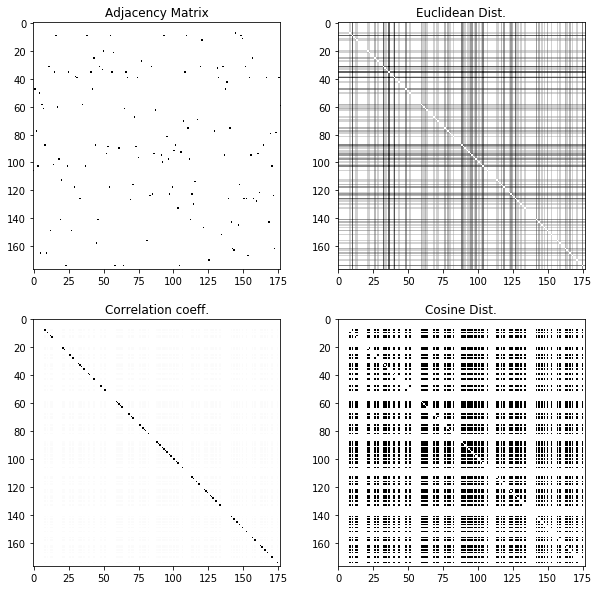

In [118]:
G = nx.DiGraph()

for row, data in kill_events.iterrows():
    killer = data[2]
    killed = data[0]
    G.add_edge(killer, killed)
    
A = nx.to_numpy_matrix(G, dtype=int)
A = np.asarray(A)
plotDist(A)

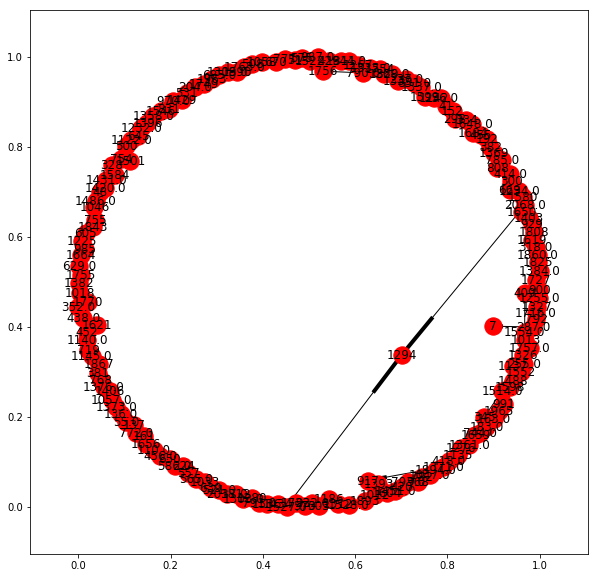

In [44]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [46]:
characters[characters.characterID == 1294]

,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
186,1294,Paul,Night Watch,0,0,0,NaN,NaN
187,1294,Paxter Redwyne,Tyrell,0,0,0,Lord of the Arbor,Lord


Explanation:
* The graph is mostly a ring graph because characters of GOT operate in a few arcs. Characters from arcs usually kill eachother and rarely kill characters from other arcs. One character rarely kills many other characters.
* The "1294" is an error in data. Apparently two characters have the same `characterID` in this dataset, so there is a node with two edges pointing at it.
* Let's move him

In [47]:
kill_events.head()

,characterID,event,withID
7,1808,killed,2068.0
9,1825,killed,1808.0
25,557,killed,456.0
289,1186,killed,1528.0
518,755,killed,629.0


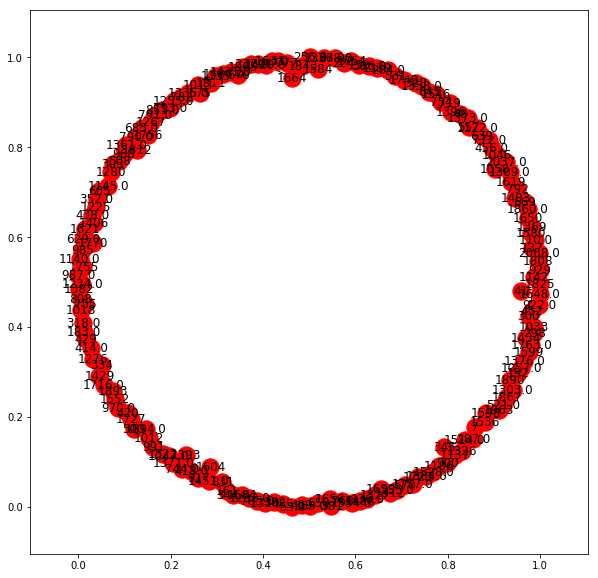

In [116]:
characters = characters[characters.characterID != 1294]
kill_events = kill_events[(kill_events.characterID != 1294) & (kill_events.withID != 1294)]
G = nx.DiGraph()

for row, data in kill_events.iterrows():
    killer = data[2]
    killed = data[0]
    G.add_edge(killer, killed)
    
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [119]:
degrees = pd.Series(G.out_degree())
print('Who killed most people?')
characters[characters.characterID == degrees.idxmax()]

Who killed most people?


,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
93,629,Gregor Clegane,Robert,0,0,0,knight,Ser


In [122]:
# Let's check characters that were mentioned more than a few times

m_events = events[events['event'] == 'mentioned']
m_events = pd.DataFrame(m_events, index = None, columns=['characterID'])
m_events = m_events.dropna()
character_mentions = m_events.characterID.value_counts()

character_mentions.describe()

count    296.000000
mean      13.398649
std       18.266108
min        1.000000
25%        3.000000
50%        7.000000
75%       15.000000
max       98.000000
Name: characterID, dtype: float64

In [123]:
# Treshold mentions at 10. Get only important characters
treshold_characters = np.array(character_mentions[character_mentions > 10].index)
treshold_characters

array([ 456, 1716,  295, 1434, 1586, 1727,  785, 1431, 2068,  851,  136,
       1530,  831,  287,  352,  240, 1757, 1676, 1396, 1013,  629, 1057,
        163, 1486, 1404, 1648, 1528, 1303,  836,   27,  862, 1122, 1527,
       1326,  630, 1066,  970, 1451,  808, 1035,  255,  462, 1195, 1426,
        194,  154,  204,  256, 1770, 1045,  746, 1358,  265,  900,  790,
       1371,  586,  385,  431,  771,  922, 1552, 1257,  736,  483,  138,
        234, 1140, 1015,  243,  975,   12, 1755, 1373,  772,  868,  731,
        237, 1432,  438, 1351, 1869, 1860, 1873,  429,  818,   20, 1653,
       1763,  852, 1309,  603,  521, 1545, 1719,  832, 1422,  344, 1294])

In [124]:
print('Chars', characters.shape)
important_characters = characters[characters.characterID.isin(treshold_characters)]
print('Important chars', important_characters.shape)
important_characters.head()

('Chars', (296, 8))
('Important chars', (98, 8))


,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
4,12,Aegon Targaryen,Targaryen,1,0,0,prince,Prince
5,1045,Aemon,Night Watch,0,0,0,maester,Maester
6,20,Aemon Targaryen,Targaryen,1,0,0,NaN,NaN
8,27,Aerys II Targaryen,Targaryen,1,0,0,King of the Seven Kingdoms,King
20,136,Arya Stark,Stark,0,0,0,NaN,Lady


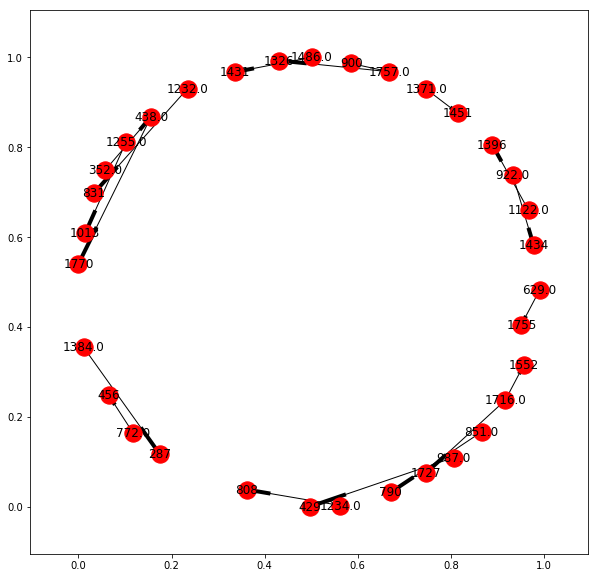

In [125]:
important_kills = kill_events[kill_events.characterID.isin(important_characters.characterID)]

G = nx.DiGraph()

for row, data in important_kills.iterrows():
    killer = data[2]
    killed = data[0]
    G.add_edge(killer, killed)
    
plt.figure(figsize=(10,10))
nx.draw_networkx(G)

# 2. Analyze http://snap.stanford.edu/data/CollegeMsg.html temporal network
Find the example of temporal network, that increases assortativity at early stages and became higly disassortative later. Explain this process.

In [168]:
def draw_nx(g):
    plt.figure(figsize=(13,13))
    plt.axis('off')
    nx.draw_networkx(g,
                node_size = 100,
                node_color='grey',
                edge_color = 'gray',
                with_labels = True,
                font_size=16,
                alpha=0.4)
    
def draw_nx_sub(g):
    plt.axis('off')
    nx.draw_networkx(g,
                node_size = 100,
                node_color='grey',
                edge_color = 'gray',
                with_labels = True,
                font_size=16,
                alpha=0.4)

In [186]:
data = pd.read_csv('CollegeMsg.txt', sep=" ", header=None)
data.columns = ['node1', 'node2', 'timestamp']
data.node1 = data.node1.astype(int)
data.node2 = data.node2.astype(int)
data.timestamp = data.timestamp.astype(int)
data['dt'] = pd.to_datetime(data.timestamp, unit='s')
data = data.sort_values(by='timestamp')
data.head(10)

,node1,node2,timestamp,dt
0,1,2,1082040961,2004-04-15 14:56:01
1,3,4,1082155839,2004-04-16 22:50:39
2,5,2,1082414391,2004-04-19 22:39:51
3,6,7,1082439619,2004-04-20 05:40:19
4,8,7,1082439756,2004-04-20 05:42:36
5,9,10,1082440403,2004-04-20 05:53:23
6,9,11,1082440453,2004-04-20 05:54:13
7,12,13,1082441188,2004-04-20 06:06:28
8,9,14,1082441754,2004-04-20 06:15:54
9,9,15,1082441824,2004-04-20 06:17:04


In [187]:
data.timestamp.describe()

count    5.983500e+04
mean     1.086062e+09
std      3.195520e+06
min      1.082041e+09
25%      1.084009e+09
50%      1.085120e+09
75%      1.086386e+09
max      1.098777e+09
Name: timestamp, dtype: float64

In [188]:
data.dt.describe()

count                   59835
unique                  58911
top       2004-10-17 00:12:41
freq                       38
first     2004-04-15 14:56:01
last      2004-10-26 07:52:22
Name: dt, dtype: object

In [240]:
def temporal_graphs(edges, n_splits):
    graphs = []
    timestamps = []
    
    #all_nodes = set(edges.node1.unique()).union(set(edges.node2.unique()))
    for k in range(0, len(edges), len(edges)/n_splits):
        if k == 0:
            continue
        split_edges = edges.iloc[:k]
        timestamp = split_edges.iloc[-1].timestamp
        
        graph = nx.Graph()
        #graph.add_nodes_from(all_nodes)
        split_edges = split_edges[['node1', 'node2']].values
        graph.add_edges_from(split_edges)
        graph.timestamp = timestamp
        graph.split_index = k
        graphs.append(graph)
    return graphs
        
graphs = temporal_graphs(data, 100)

In [241]:
min_time = data.timestamp.min()
max_time = data.timestamp.max()
print('Datetime range:')
pd.to_datetime(min_time, unit='s'), pd.to_datetime(max_time, unit='s')

Datetime range:


(Timestamp('2004-04-15 14:56:01'), Timestamp('2004-10-26 07:52:22'))

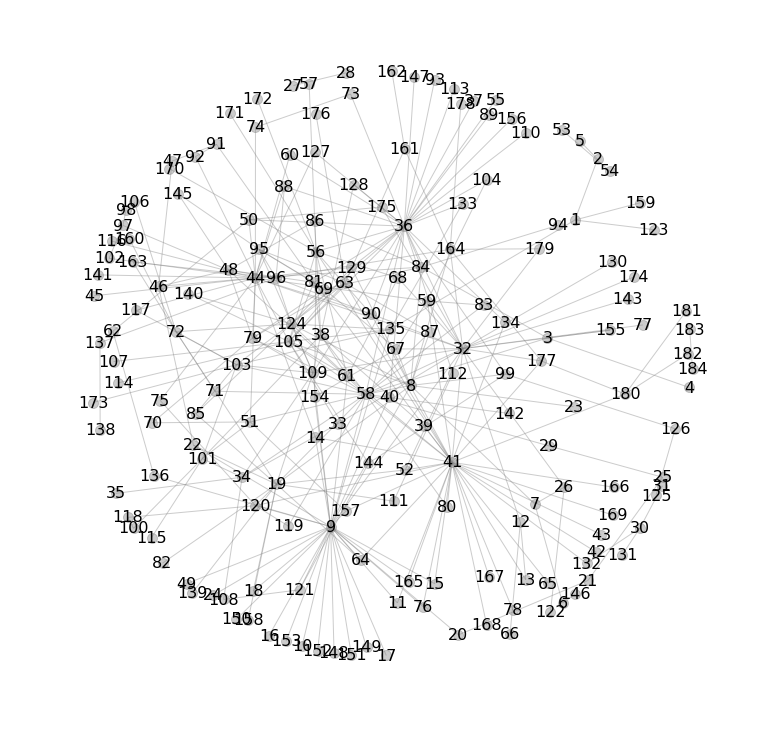

In [242]:
draw_nx(graphs[0])

In [ ]:
plot_amount = 5
index = 1
plt.figure(figsize=(10, 10*plot_amount))
splits_to_plot = set(list(range(0, len(graphs), len(graphs)/(plot_amount-1))) + [len(graphs)-1])
plot_amount = len(splits_to_plot)
for split_num in splits_to_plot:
    g = graphs[split_num]
    plt.subplot(plot_amount, 1, index)
    plt.title('Split %d, time %s' % (split_num, pd.to_datetime(g.timestamp, unit='s')))
    draw_nx_sub(g)
    index+=1
plt.show()

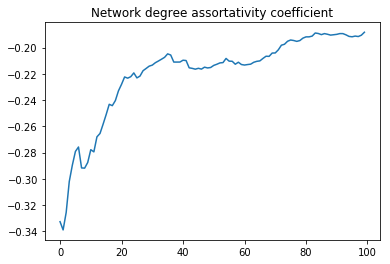

In [243]:
assortativity = [nx.degree_assortativity_coefficient(g) for g in graphs] 
plt.title('Network degree assortativity coefficient')
plt.plot(range(len(graphs)), assortativity)
plt.show()

What the fuck even

This network is wholly disassortative at all stages.

## http://snap.stanford.edu/data/email-Eu-core-temporal.html

In [244]:
data = pd.read_csv('email_eu.txt', sep=" ", header=None)
data.columns = ['node1', 'node2', 'timestamp']
data.node1 = data.node1.astype(int)
data.node2 = data.node2.astype(int)
data.timestamp = data.timestamp.astype(int)
data['dt'] = pd.to_datetime(data.timestamp, unit='s')
data = data.sort_values(by='timestamp')
data.head(10)

,node1,node2,timestamp,dt
0,582,364,0,1970-01-01 00:00:00
1,168,472,2797,1970-01-01 00:46:37
2,168,912,3304,1970-01-01 00:55:04
3,2,790,4523,1970-01-01 01:15:23
4,2,322,7926,1970-01-01 02:12:06
5,2,790,8061,1970-01-01 02:14:21
6,42,402,19403,1970-01-01 05:23:23
7,870,337,19560,1970-01-01 05:26:00
8,663,362,21077,1970-01-01 05:51:17
9,663,410,21280,1970-01-01 05:54:40


In [245]:
graphs = temporal_graphs(data, 100)

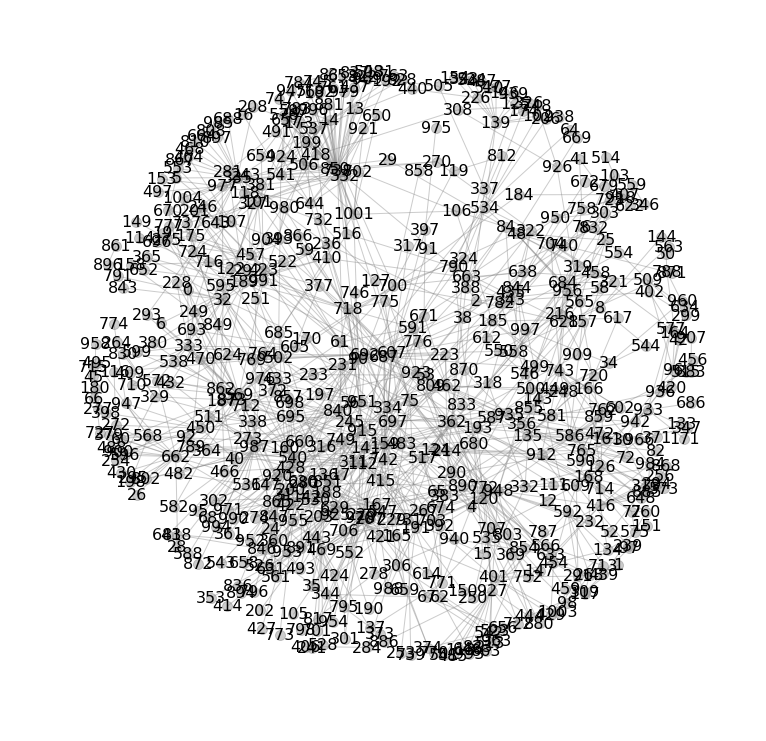

In [246]:
draw_nx(graphs[0])

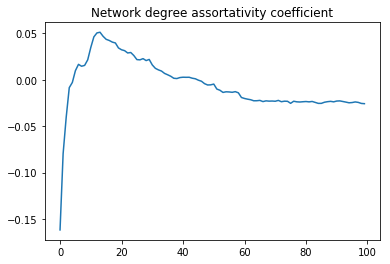

In [247]:
assortativity = [nx.degree_assortativity_coefficient(g) for g in graphs] 
plt.title('Network degree assortativity coefficient')
plt.plot(range(len(graphs)), assortativity)
plt.show()